# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import cv2
import numpy as np
import pandas as pd

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,   630.,
          420.,  1110.,  1200.,   210.,   360.,   330.,   390.,   510.,
          270.,  1500.,   600.,   240.,   540.,   270.,   450.,   780.,
          240.,   689.,   420.,  1200.,   390.,   210.,  2070.,   300.,
          360.,   240.,   240.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

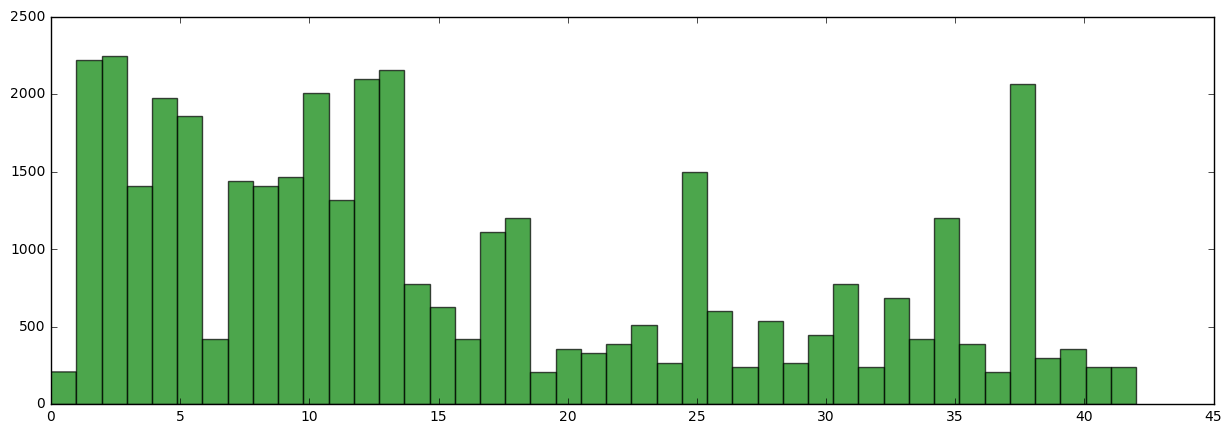

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import pandas as pd

# Let's read the signs file to get the idea
signs = pd.read_csv("signnames.csv")
# Plotting the histogram first for the dataset
fig = plt.figure(figsize = (15,5))
plt.hist(y_train,n_classes,color = 'green',alpha = 0.7)


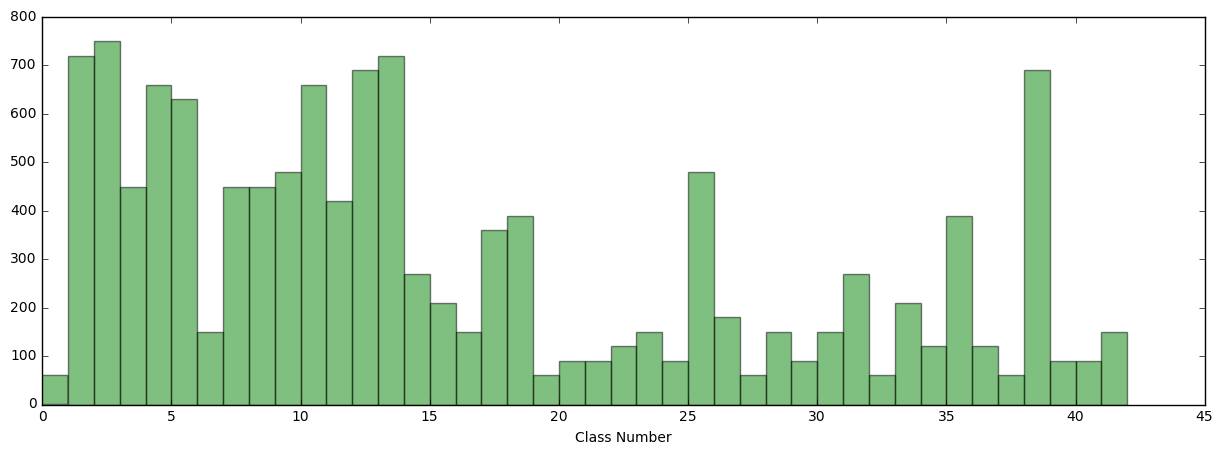

In [5]:
plt.figure(figsize = (15,5))
plt.hist(y_test,list(set(y_test)),alpha= 0.5, color ='green')
plt.xlabel("Class Number")

In [6]:
train_signs = pd.DataFrame({"ClassId": list(y_train)})
train_signs = pd.merge(train_signs, signs, how = 'inner', on ='ClassId')
train_signs = train_signs.groupby(['ClassId','SignName']).aggregate(len).reset_index().rename(columns = {0:"Train_Length"})

In [7]:
test_signs = pd.DataFrame({"ClassId": list(y_test)})
test_signs = test_signs.ClassId.value_counts().reset_index()
test_signs.columns = ['ClassId', "Test_Length"]
train_signs = pd.merge(train_signs, test_signs, how = 'outer', on = 'ClassId')

In [ ]:
train_signs

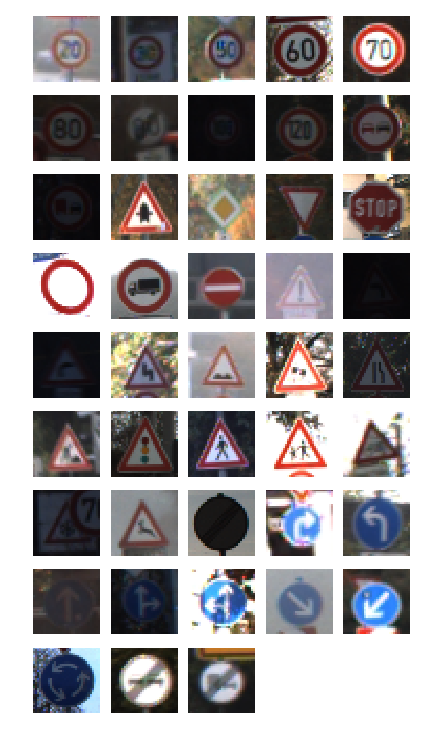

In [8]:
# Let's plot the images of a particular sign and see the differences
import matplotlib.gridspec as gridspec
import random

num_rows = 9
num_cols = 5

fig = plt.figure(figsize=(num_cols,num_rows))
gs = gridspec.GridSpec(num_rows, num_cols,wspace = 0.0)
ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]
for i in range(num_rows*num_cols):
    ax[i].axis('off')
    if i <43:
        indexes = list(np.where(y_train ==i))[0]
        image = X_train[random.choice(indexes)]
        ax[i].imshow(image,interpolation = 'nearest')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
y_train_backup = y_train
X_train_backup = X_train

In [10]:
# Trying to do stratified sampling for the data
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit

sss = StratifiedShuffleSplit( list(y_train_backup), test_size = 0.2,random_state=0)
for train_index,val_index in sss:
    X_validation = X_train_backup[val_index,:,:,:]
    X_train = X_train_backup[train_index,:,:,:]
    y_validation = y_train_backup[val_index]
    y_train = y_train_backup[train_index]

/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
import collections
train_dist = collections.Counter(y_train)
val_dist = collections.Counter(y_validation)
train_dist = pd.DataFrame.from_dict(train_dist,orient = 'index').reset_index()
val_dist = pd.DataFrame.from_dict(val_dist,orient = 'index').reset_index()
train_dist.columns = ['ClassId', 'Train_Count']
val_dist.columns = ['ClassId', 'Val_Count']
train_dist['Train_Percent'] = 100*train_dist['Train_Count']/train_dist.Train_Count.sum()
val_dist['Val_Percent'] = 100*val_dist['Val_Count']/val_dist.Val_Count.sum()
train_val_dist = pd.merge(train_dist,val_dist, on = 'ClassId', how = 'outer')
train_val_dist['Dist_Difference'] = train_val_dist.Train_Percent - train_val_dist.Val_Percent

In [12]:
train_val_dist

,ClassId,Train_Count,Train_Percent,Val_Count,Val_Percent,Dist_Difference
0,0,168,0.535595,42,0.535578,0.000017
1,1,1776,5.662001,444,5.661821,0.000181
2,2,1800,5.738515,450,5.738332,0.000183
3,3,1128,3.596136,282,3.596021,0.000115
4,4,1584,5.049893,396,5.049732,0.000161
5,5,1488,4.743839,372,4.743688,0.000151
6,6,336,1.071189,84,1.071155,0.000034
7,7,1152,3.672650,288,3.672533,0.000117
8,8,1128,3.596136,282,3.596021,0.000115
9,9,1176,3.749163,294,3.749044,0.000120


In [13]:
# Generate Fake Images Data. 
# Let's keep 2500 images for each category and test out the result
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

In [ ]:
import random
for i in range(1,len(set(y_train))):
    print (i)
    indexes= list(np.where(y_train == i))[0]
    num_images = train_val_dist[train_val_dist.ClassId == i].Train_Count[i]
    for j in range(num_images, 3000):
        if j%1000 == 0:
            print (j)
        img = X_train[random.choice(indexes)]
        transformed_image = transform_image(img,20,20,5).reshape(1,32,32,3)
        X_train = np.vstack([X_train,transformed_image])
        y_train = np.append(y_train, i)

In [15]:
#np.save("X_train_augmented.npy",X_train)
#np.save("y_train_augmented.npy",y_train)

In [16]:
#X_train = np.load("X_train_augmented.npy")
#y_train = np.load("y_train_augmented.npy")

In [17]:
print (X_train.shape)
print (y_train.shape)

(129000, 32, 32, 3)
(129000,)


In [19]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE =128

In [20]:
#### Changing the images to Grayscale
import cv2
import numpy as np
#img = cv2.cvtColor( X_train[0], cv2.COLOR_RGB2GRAY )
X_train_gray = np.zeros((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_validation_gray = np.zeros((X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1))
X_test_gray = np.zeros((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
for i in range(len(X_train)):
    if i%10000 == 0:
        print (i)
    temp= cv2.cvtColor(X_train[i],cv2.COLOR_RGB2GRAY)
    temp = temp[...,None]
    X_train_gray[i] =temp
for i in range(len(X_validation)):
    temp= cv2.cvtColor(X_validation[i],cv2.COLOR_RGB2GRAY)
    temp = temp[...,None]
    X_validation_gray[i] =temp
for i in range(len(X_test)):
    temp= cv2.cvtColor(X_test[i],cv2.COLOR_RGB2GRAY)
    temp = temp[...,None]
    X_test_gray[i] =temp

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [23]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

** Answer **:
1. As there was clearly a class imbalance I generated the fake data so that all the classes have 3K data points.
2. Converted the images to grayscale. I chose grayscale as we just want to predict the structure in the photo and no color is required for classification. So having color is actually a distraction for the algorithm

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

**Testing Data**:
    I used the test dataset given in the problem as the test dataset

** Validation Data**: 
    I sampled 20% of the data from Training set in a stratified manner for Validation Set.

** Training Data **:
    In rest of the training data, there was a lot of mismatch in the number of samples per category.As this imabalance can cause classifier to be biased to some categories, I decided to generate additional data for each category such that total number of samples in each category become 3K. I chose the number 3K as the max number of samples in a category before generating fake data were around 2500.So I decided to do a round off number of 3K.This approach seems to have worked best for me. There are other approaches

** How to generate Fake Data ** 
There are many ways to image transformation. However, the simplest ones are doing rotation,affine transformations through shear and trans.
I didn't play much with these parameters and kept them to chose values. Another reason was that it took a lot of time to generate fake data which was bottleneck in experimentation.
Rotation = (0,20)
Shear = (0,20)
Trans = (0,20)


** Differences from the original Data **
In new data, images are rotated by upto 20 degrees and little more blurred I would say with shear parameter

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

**Answer:**

** Neural Network Design Is as Follows **
1. Input : 32x32x1
2. Conv Layer: Output = 28x28x10 (10 Filters)
3. Relu Layer
4. Max Pool Layer (ksize =3, stride =1): Output = 26x26x10
5. Conv Layer: Output = 24x24x15 ( 15 filters)
6. Relu Layer
7. Max Pool Layer (ksize =2 ,stride = 2): Output = 12x12x15
8. Conv Layer: Output = 10x10x30 (30 filters)
9. Relu Layer
10. Max Pool Layer (ksize =2, stride =2): Output = 5x5x30
11. Flatten Layer : Output = 750x1
12. FC Layer : Output : 400x1
13. Relu Layer
14. Fc Layer : Ouput : 120x1
15. Relu Layer
16. FC Layer :Output : 84x1
17. Relu Layer
18. FC Layer : Output: 43x1

** Overall**:
    1. 3 conv Layers with increasing filter sizes
    2. 4 FC Layers
    3. No dropout layers 
    4. Relu after every FC or Conv Layer
    5. Max_Pool after every Conv Layer

In [24]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #new_height = (input_height - filter_height + 2 * P)/S + 1
    #new_width = (input_width - filter_width + 2 * P)/S + 1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1 (Assuming Grayscale). Output = 28x28x10.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 10), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(10))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    #new_height = (input_height - filter_height)/S + 1
    #new_width = (input_width - filter_width)/S + 1

    # SOLUTION: Pooling. Input = 28x28x10. Output = (26x26x10) 
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='VALID')
    
    ## Temp Layer in Le Net 26x26x30 , Output :24x24x15
    conv1_temp_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 10, 15), mean = mu, stddev = sigma))
    conv1_temp_b = tf.Variable(tf.zeros(15))
    conv1_temp = tf.nn.conv2d(conv1, conv1_temp_W,strides= [1,1,1,1], padding = 'VALID') + conv1_temp_b    
    conv1_temp = tf.nn.relu(conv1_temp)
    
    # Pooling : Input: 24x24x15, Output : 12x12x15
    conv1_temp = tf.nn.max_pool(conv1_temp, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')

    # SOLUTION: Layer 2:  Input : 12x12x15 , Convolutional. Output = 10x10x30. ( )
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 15, 30), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(30))
    conv2   = tf.nn.conv2d(conv1_temp, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # SOLUTION: Pooling. Input = 10x10x30. Output = 5x5x30.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x30. Output = 750.
    fc0   = flatten(conv2)
    
    # Adding another fully connected layer 750 -> 400
    fc00_W = tf.Variable(tf.truncated_normal(shape=(750, 400), mean = mu, stddev = sigma))
    fc00_b = tf.Variable(tf.zeros(400))
    fc00   = tf.matmul(fc0, fc00_W) + fc00_b
    fc00 = tf.nn.relu(fc00)
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc00, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [25]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
#keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [26]:
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Conv1 shape after Relu

(?, 24, 24, 15)
(?, 12, 12, 15)
Conv2 Shape

(?, 5, 5, 30)
(?, 750)


In [27]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [28]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

**Training Model Parameters **:
    1. Increasing of EPOCH size improved the results. However after 100 EPOCHS it didn't really matter
    2. Increasing batch size actually degraded the performance. Increasing batch sizes obviously speeds up the algorithms. However, smaller batch sizes helps in not getting stuck in local minima.
    3. Learning Rate : Learning rate was optimal at 0.001. Any change from here degraded the performance.
    4. Optimizer: In the interest of time, I didn't play around a lot with types of optimizer.

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_gray)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train = shuffle(X_train_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})      
        validation_accuracy = evaluate(X_validation_gray, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, 'lenet_trafficSigns')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.816
EPOCH 2 ...
Validation Accuracy = 0.917
EPOCH 3 ...
Validation Accuracy = 0.950
EPOCH 4 ...
Validation Accuracy = 0.957
EPOCH 5 ...
Validation Accuracy = 0.948
EPOCH 6 ...
Validation Accuracy = 0.969
EPOCH 7 ...
Validation Accuracy = 0.967
EPOCH 8 ...
Validation Accuracy = 0.973
EPOCH 9 ...
Validation Accuracy = 0.975
EPOCH 10 ...
Validation Accuracy = 0.975
EPOCH 11 ...
Validation Accuracy = 0.973
EPOCH 12 ...
Validation Accuracy = 0.976
EPOCH 13 ...
Validation Accuracy = 0.977
EPOCH 14 ...
Validation Accuracy = 0.981
EPOCH 15 ...
Validation Accuracy = 0.979
EPOCH 16 ...
Validation Accuracy = 0.980
EPOCH 17 ...
Validation Accuracy = 0.981
EPOCH 18 ...
Validation Accuracy = 0.978
EPOCH 19 ...
Validation Accuracy = 0.977
EPOCH 20 ...
Validation Accuracy = 0.980
EPOCH 21 ...
Validation Accuracy = 0.980
EPOCH 22 ...
Validation Accuracy = 0.978
EPOCH 23 ...
Validation Accuracy = 0.978
EPOCH 24 ...
Validation Accuracy = 0.979
EPOCH 25 ...

In [31]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

**Steps taken are as follows:**
    1. Used the Le Net structure directly with train and validation split.Changed the EPOCHS to 20 and Batch Size 256 Gave 95% validation accuracy. Tried to see test set and accuracy was 95%
    2. Did train and validation split again. This time by using Stratified Sampling. Changed the EPOCHS to 50 and Batch size to 256. Not much change. Achieved 95.5% val accuracy
    3. Augmented the data as suggested to 3K images in each category. Increased the EPOCHS to 100 and Batch Size to 128.Changed the images to grayscale.
    4. Changed the filters in Le Net to 10 filters in first layer and 30 filters in second conv layer. This worked very well as expected. With more number of filters we are able to map complex features better. Achived 97% accuracy.
    5. Tried to increase the batch size to 256, 512 etc. but result degraged. Decided to keep batch size as 128.
    6. Tried changing the learning rate to 0.0001 and 0.01. Both resulted in degrading the performance.
    7. Added another Conv Layer with 15 filters and one more FC layer. Val accuracy improved to 98.8%. It was quite clear from here that deeper and wider networks improve the results.
    8. Tried inverting the filter structure in Conv Layers. Going to 30,15,10 from 10,15,30. Didn't help much. 
    9. Reverted back to original structure. Tried incorporating dropout to check if the model was overfitting. Implemented dropout after each Conv Layer. This resulted in heavy loss of accuracy. Dropout is generally applicable to deep networks but not so much helpful here.
    9. Finally, should have tried to change the optimizer, include few more conv and fc layers, implemented the structure as suggested in the paper or  normalized for data points or experimented with augmentation parameters. In the interest of time, I decided to most relevant parameters for performance improvement.
    

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [32]:
# Let's test the model on the testing dataset
with tf.Session() as sess:
    #loader = tf.train.import_meta_graph('lenet_trafficSigns.meta')
    #loader.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print ("Model Restored")
    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Model Restored
Test Accuracy = 0.914


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [54]:
# Let's read the 6 candidate images
import os 
temp = os.listdir("New_Images")
imagesTogether = []	

for i in range(len(temp)):
        imagesTogether.append(cv2.resize(cv2.imread("New_Images/"+temp[i]),(32,32)))
imagesTogether = np.asarray(imagesTogether)

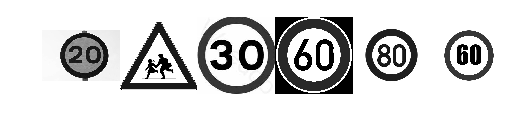

In [55]:
# Let's print out the images to see the effect.
# Let's plot the images of a particular sign and see the differences
import matplotlib.gridspec as gridspec
import random
temp = os.listdir("New_Images")

num_rows = 1
num_cols = len(imagesTogether)

fig = plt.figure(figsize=(num_cols,num_rows))
gs = gridspec.GridSpec(num_rows, num_cols,wspace = 0.0)
ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]
for i in range(num_rows*num_cols):
    ax[i].axis('off')
    #indexes = list(np.where(y_train ==i))[0]
    image = cv2.imread("New_Images/"+temp[i])
    image= cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    
    ax[i].imshow(image,interpolation = 'nearest',cmap ='gray')

In [59]:
# Convert the images into grayscale
imagesTogether_gray = np.zeros((imagesTogether.shape[0],imagesTogether.shape[1],imagesTogether.shape[2],1))
for i in range(len(imagesTogether)):
    temp= cv2.cvtColor(imagesTogether[i],cv2.COLOR_RGB2GRAY)
    temp = temp[...,None]
    imagesTogether_gray[i] =temp

labels =  [0,28,1,3,5,3]

In [60]:
# New Evaluate function as we don't want Batch Size here
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_data, y: y_data})
    total_accuracy += (accuracy * len(X_data))
    return total_accuracy / num_examples

In [61]:
# Let's run the predictions here to check what is working
predictSoftmax = tf.nn.softmax(logits)

with tf.Session() as sess:
    # restore saved session
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #saver.restore(sess, 'folder name/')
    print("Model restored")
    # for images from internet
    softmaxProb = sess.run(predictSoftmax, feed_dict={x: imagesTogether_gray})
    test_accuracy = evaluate(imagesTogether_gray, labels)
    top_k = sess.run(tf.nn.top_k(tf.constant(softmaxProb), k=3))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Model restored
Test Accuracy = 0.500


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._

**Answer:**

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**:
    * Combining the answers for question 7 and 8 as they look similar. We tested the model on 6 images collected from google and the accuracy was 50%. This was mainly due to signs were from US and not from the same German dataset. However, one would imagine there are some issues with predictions too. 
    
    * Visualized the softmax probabilities as shown in the figures below. I have pulled up sample images in all the predicted categories for images in the first column. Some analysis:
        * There are two images of 60 speed limit sign. One is right classified and other one is not. This is mainly because number 6 curves at top in one and not in other one. Training data has only the non curved one.
        * 80 speed limit is correctly classified
        * Children walking sign is incorrectly classified. There is definitely some difference in the structure between the new image and training data images
        * 30 speed limit sign is incorrectly classified.I suspect because of font but might as well be due to model performance.
    

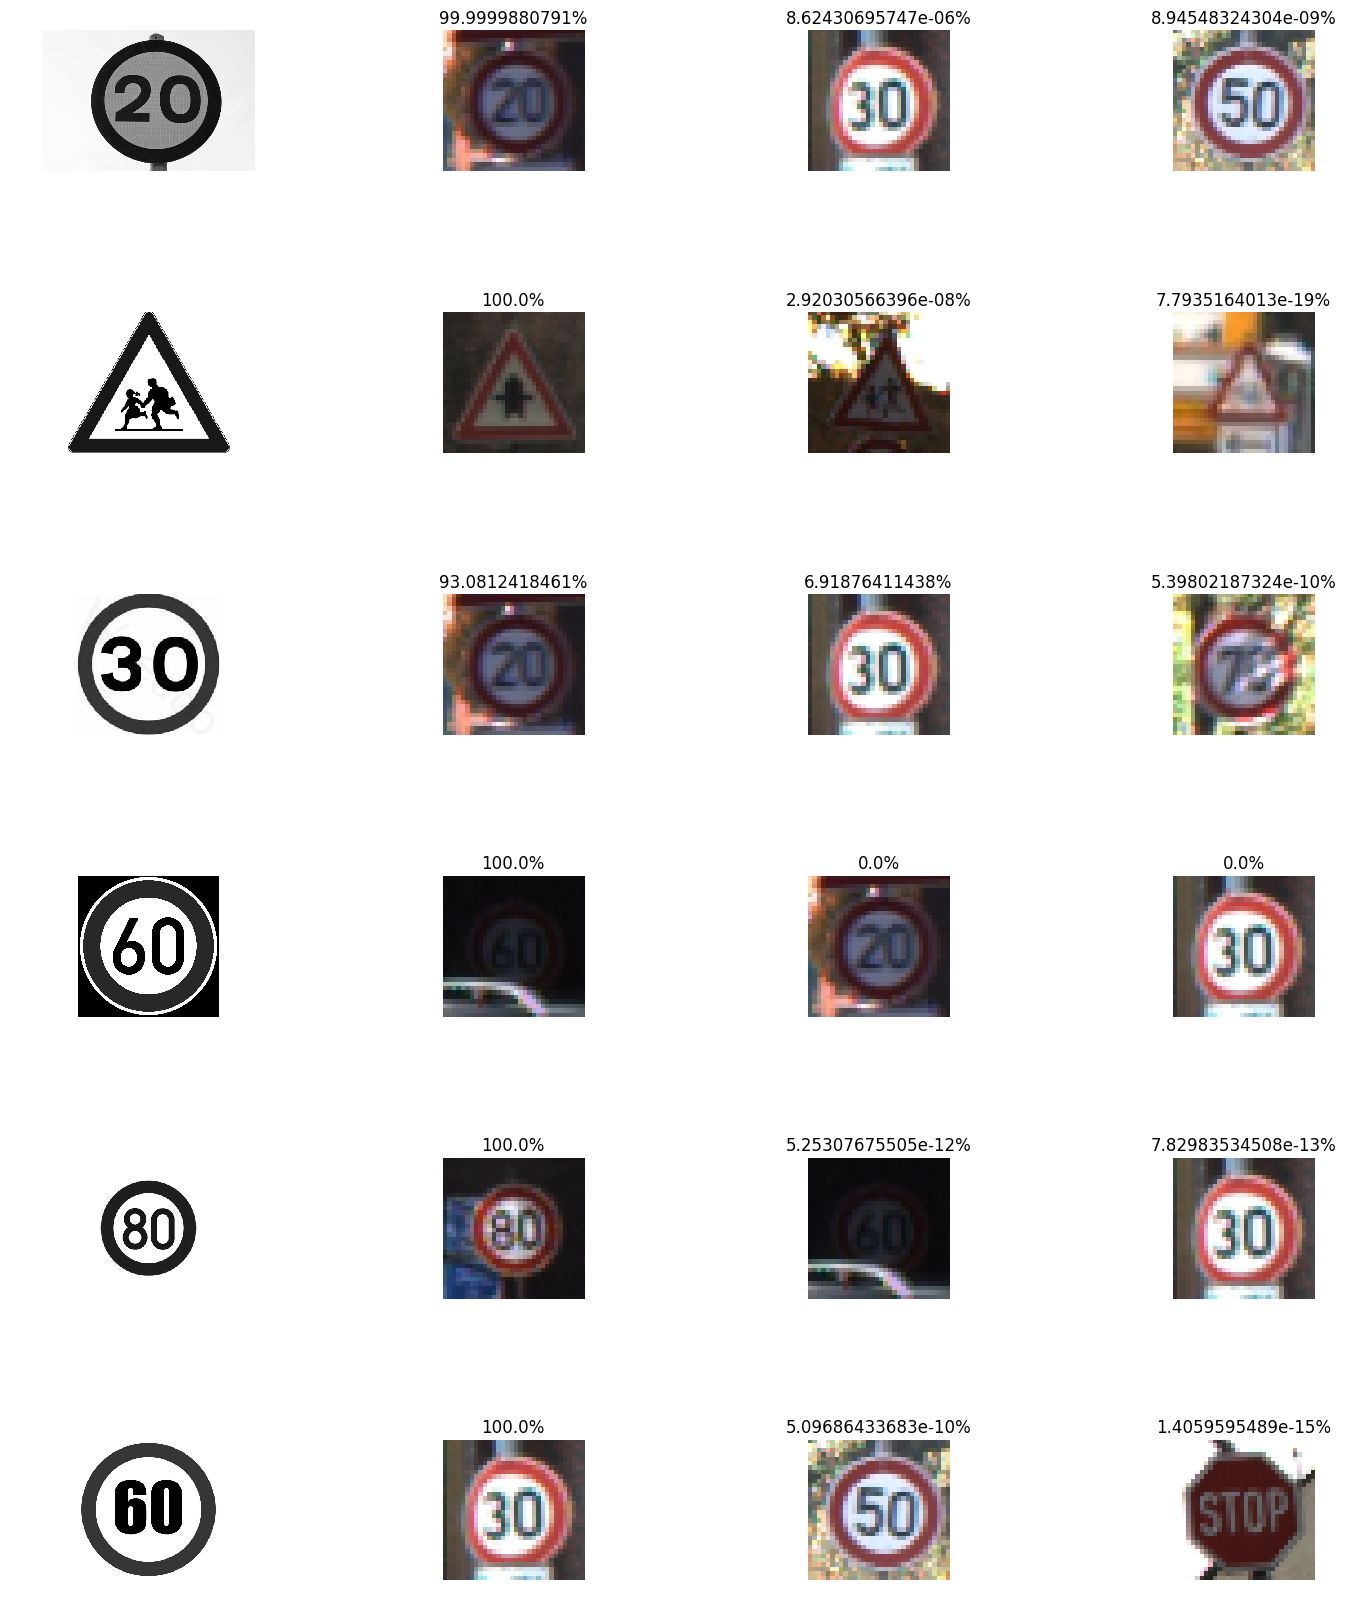

In [65]:
# Let's visualize the results.
import matplotlib.gridspec as gridspec
import random
temp = os.listdir("New_Images")

num_rows = len(imagesTogether)
num_cols = 4

fig = plt.figure(figsize=(40,20))
gs = gridspec.GridSpec(num_rows, num_cols,hspace = 1.0,left = 0.55)
ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]
for i in range(num_rows):
    ax= plt.subplot(gs[i,0])
    ax.axis('off')
    #indexes = list(np.where(y_train ==i))[0]
    image = cv2.imread("New_Images/"+temp[i])
    image= cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    ax.imshow(image,interpolation = 'nearest',cmap ='gray')
for i in range(num_rows):
    predicted_indices = list(top_k.indices[i])
    predicted_prob = list(top_k.values[i])
    predicted_prob = [x*100 for x in predicted_prob]
    for j in range(1,num_cols):
        ax = plt.subplot(gs[i,j])
        index = list(np.where(y_test == predicted_indices[j-1]))[0][0]
        image = X_test[index]
        ax.imshow(image,interpolation = 'nearest',cmap ='gray')
        ax.axis('off')
        title = str(predicted_prob[j-1]) + '%'
        ax.set_title(title)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.